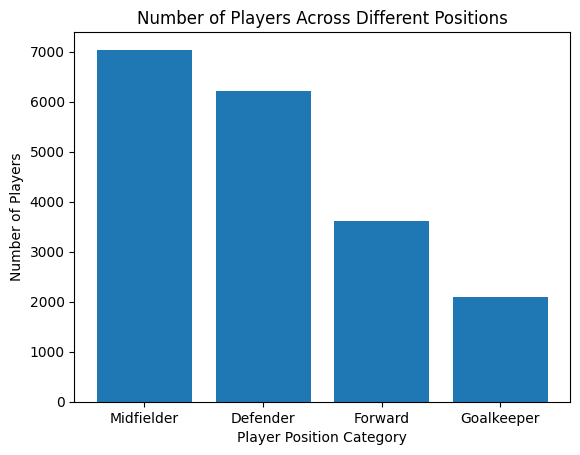

/tmp/ipykernel_611078/1110136104.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_pos = df.groupby(['Position_Category', 'Rating_Range']).size().reset_index(name='Count')


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("fifa_dataset/players_21.csv")

def categorize_position(pos):
    if pos in ['ST', 'CF', 'LW', 'RW', 'LF', 'RF']:
        return 'Forward'
    elif pos in ['CM', 'CDM', 'CAM', 'LM', 'RM']:
        return 'Midfielder'
    elif pos in ['CB', 'LB', 'RB', 'LWB', 'RWB']:
        return 'Defender'
    else:
        return 'Goalkeeper'

df['Position_Category'] = df['player_positions'].apply(lambda x: categorize_position(x.split(',')[0]))

pos_count = df['Position_Category'].value_counts()

plt.figure()
plt.bar(pos_count.index, pos_count.values)
plt.xlabel("Player Position Category")
plt.ylabel("Number of Players")
plt.title("Number of Players Across Different Positions")
plt.show()

bins = [0, 70, 80, 90, 100]
labels = ['<70', '70-79', '80-89', '90+']

df['Rating_Range'] = pd.cut(df['overall'], bins=bins, labels=labels)

rating_pos = df.groupby(['Position_Category', 'Rating_Range']).size().reset_index(name='Count')

fig = px.pie(rating_pos,
             names='Rating_Range',
             values='Count',
             color='Rating_Range',
             hole=0.45,
             title="Distribution of Overall Ratings by Position Category")
fig.show()

df_clean = df.dropna(subset=['club_name'])
fig2 = px.treemap(df_clean.head(2000),
                  path=['club_name', 'Position_Category', 'overall'],
                  values='overall',
                  title="Hierarchical Relationship: Clubs, Position & Overall Ratings")
fig2.show()